In [1]:
import numpy as np
from collections import defaultdict  # if using dictionary as graph for tree structure
import pandas as pd
import random as rn
import copy
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph
import pygraphviz as pgv
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.tree import plot_tree # tree diagram
from collections import defaultdict

In [2]:
"""
Graph and Node class

A graph which can represent a decision tree.
Data rely on content in a pandas dataframe "examples"

"""

class Graph:
    def __init__(self, root="", nodes=None, default_child=None, edges=None):
        self.root  = root                        # will be the attribute name of ROOT
        self.default_child = default_child
        self.edges = edges or defaultdict(list)  # possibly not used?
        self.nodes = nodes or defaultdict(list)  # same as branches
    
    def __call__(self):
        return self.root
        
    class Edge:
        def __init__(self, start, end, weight=1):
            self.start  = start
            self.end    = end
            self.weight = weight
    
    # Can add a singel node or a branch-node
    def addNode(self, a, node):
        self.nodes[a].append(node)
        
    def getChild(self):
        for parent, n in self.nodes.items():
            #print("K (parent) -> ",parent)
            for v in n:
                #print("V -> ", v)
                # This one is working
                if (v.child):
                    print("Child ", v.child)
                    return True, parent, v.value
                
        return False, None, None
    
    # A and B are nodes
    def addEdge(self, a, b):
        edge = self.Edge(self, a, b, weight)
        self.edges[a.name].append(edge)
        self.edges[b.name].append(edge)
        
    def show(self):
        print("Attribute: ", self.name)
        for i in self.nodes:
            print("item ", i)
            
    def isEmpty(self):
        if len(self.nodes):
            return False
        return True
    
    def getParent(self):
        parent = ""
        for n in self.nodes.items():
            for no in self.nodes[n]:
                if (not no.attribute == "Root"):
                    parent = no.attribute
        return parent
    
    def count(self):
        return len(self.nodes)
    
    
class Leaf:
    def __init__(self, category):
        self.category = category
    def __call__(self, category):
        return self.category
    def __repr__(self):
        return repr(self.category)
    def display(self):
        print("Category is ", self.category)
        

class Node:
    def __init__(self, attribute=None, attributes=None, child=None, parent=None, weight=None, gain=None, index=None, value=None, neighbours=None, leaf=-1):
        self.attribute  = attribute  # Attribute name 
        self.attributes = attributes or attribute
        self.child      = child      # Attribute name of default child(best)
        self.parent     = parent     # Current parent node
        self.weight     = weight     # Number of examples
        self.gain       = gain       # Gain in float
        self.neighbours = neighbours or defaultdict(list)
        self.leaf       = leaf       # If not leaf-node, leaf = -1 else category value 
        self.index      = index      # The index of parent that is most promising
        self.value      = value      # The label value on the attribute
        
    def show(self):
        print("Weight: ", self.weight)
        print("Leaf: ", self.leaf)
        
    def changeChild(self, ch):
        self.child = ch
        
    def changeIndex(self, ind):
        self.index = ind
    
    def hasParent(self):
        if (self.parent):
            return True, parent
        return False, ""
    
    def hasChild(self):
        if (self.child):
            return True, self.child
        return False, ""


    
    

In [3]:
"""
Helper links to manipulate Pandas dataframes:
https://pythonbasics.org/pandas-iterate-dataframe/


Implemented from pseudo code AIMA(2020) 19.5 
Learn-Decision-Tree()

Parameters:
examples ......... the test data preferably Pandas Dataframe
attributes ....... a list of all attributes linked to data/examples
parent.examples .. the root node (graph?)


Returns:
A decision tree

Helper functions:

PluralityValue()
Selects the most common output value among a set of examples, breaking ties randomly

Importance()
Selecting the attribute of highest importance. Different methods to choose from.
Measured as the expected reduction in entropy from the attribute test

Here: we should use InfoGain (Entropy)

"""

def RunLDT(examples):
    tree = Graph()
    root = Node("Root")
    tree.addNode("Root", root)
    attrib = [*examples]
    return LearnDecisionTree(examples, attributes=attrib, tree=tree)

def LearnDecisionTree(ex, attributes=None, parent_examples=None, tree=None):
    
    print("\n\nSTART LDT()\n\n")
    parent_examples = ex.copy()
    
    attributes = attributes.copy()
    print("Attributes: ", attributes)
    
    #assert type(examples) == 'pandas.core.frame.DataFrame'
    print("TYPE of examples in LDT() ", type(ex))
    print("TYPE of attributes ----->  ", type(attributes))
    # Make a copy of examples as it is modified in recursion
    if (type(ex) == np.ndarray):
        examples = copy.ex()
    elif(type(ex) == dict or type(ex) == 'pandas.core.frame.DataFrame' or type(ex) == 'pandas.core.seris.Series'):
        examples = ex.copy()
    else:
        examples = ex
        
    if (not tree):
        print("Tree not found")
    
    #tree = copy.deepcopy(tree)
    
    #print(PluralityValue(examples))
    
    #target = examples.Target.copy()
    # slice out Target
    
    # Check if examples is empty
    if (not len(examples)):
        # PluralityValue returns the most common output value among
        # a set of examples, breaking ties randomly
        # Split out parent from example
        print("NO EXAMPLES LEFT (from LDT()) - calling PluralityValue(parent)")
        parent = None
        value  = None
        
        #att = attributes.copy()
        examples = examples.copy()
        att = ["Target"] + attributes
        att = att.copy()
        print("Attributes after adding Target first: ", att)

        for i in range(tree.count()):
            print("Tree is not empty")
            o, k, val = tree.getChild()
            if (not o):
                continue
            if (not k in att):
                continue
            print("O: ", o)
            print("K is parent: ", k)
            print("V: ", val)
            if k:
                parent = k
            if val:
                value = val

        if (parent and value):
            dataset = examples.loc[:,att][examples[parent] == value]
            dataset = dataset.drop(parent)
            #dataset = parent_examples[k][parent_examples[k] == val].copy()
            print("\n\nRUNNING with parents dataset from best child")
            return PluralityValue(dataset, parent)
        
        if (parent and not value):
            dataset = examples.loc[:att][examples[parent]]
            dataset = dataset.drop(parent)
            print("\n\nRUNNING no value, only parent ", parent)
            return PluralityValue(dataset, parent)
        
        print("DID NOT FIND A CHILD - ")    
        return PluralityValue(parent_examples)
    
    # Check if all examples have same class (= Y value)
    elif (examples.Target.nunique() == 1):
        # TODO possibly set a leaf-node on all attributes with Y-value (category)
            
        # Returns the attribute name and its classification as value on Y
        return examples.Target.unique()[0]
    
    # ...if attributes is empty
    elif (not len(attributes)):
        # Returns column name (attribute) for the first highest value_counts().max()
        print("\n\nNO ATTRIBUTES (from LDT()) - calling PluralityValue(examples)\n\n")
        
        return PluralityValue(examples)
    else:
        # Do the IMPORTANCE() test (A = argmax over all a in attributes from Importance())
        # A is a matrix with all a values as rows
     
        # "A" is a list with A[0] = array with all gains for d = A[0].shape[0] 
        # value categories in A. A[1] = argmax index from remainder of "attributes" 
        
        attributes = attributes.copy()
        if "Target" in attributes:
            attributes.remove("Target")
            
        print("Attributes before: ", attributes)
        
        a = attributes[0]

        A, ind = Importance(examples, a)
        print("\n\nAttribute ", a)
        print("The important index: ", ind)
        numberValues = examples[a].nunique()
        attributes.pop(0)
        
        print("Attributes after: ", attributes)
        
        reduce = 999
        
        n = Node(a, A[ind])
        tree.addNode(a, n)
        
        if (type(A[0]) == list):
            va = A[0][ind]
        else:
            va  = A[0]
        # Extract all exs from examples with value v 
        # (which is the integer index-value 0..d of A[0]) 
        # on a particular attribute with name a

        for v in range(numberValues):
            a1 = ""
            i1 = -1
            value = None
            gain = A[v]
            # Work as long as the index value is equal to value
            # Extract value from index v:
            count = examples[a].value_counts().sort_index().to_numpy()[v]
            # Use value to match attribute values in examples
            exs = examples[examples[a] == value]

            print("Value for subtree: ", value)
            print("Examples before subtree: ", exs)

            # Should send in examples[parent]
            subtree = LearnDecisionTree(exs, attributes, examples[a], tree=tree)
            # add a branch to tree with label (A = v) and subtree subtree
            att = "Value" + str(v)
            
            subtree = Node(attribute=att, parent= a, weight=count, gain=gain, index=v)
            if (reduce > gain):
                reduce = gain
                a1 = att
                i1 = v 
                value = examples[a].value_counts().sort_index().index.to_numpy()[v]
                for ch in tree.nodes[a]:
                    ch.child = a1     # The name of best child
                    ch.index = i1     # The index of best child
                    ch.gain  = gain   # The gain on best child
                    ch.value = value  # The label of the attribute a (on its child)
                    
            tree.addNode(att, subtree)
            tree = copy.deepcopy(tree)

      
    print("\n\nRETURN tree\n\n")        
    return tree

# Get q from p = number of positive and n = number of negative
# example
def BDiscrete(p,n):
    return p * 1.0/(p + n)

# Equation on page 662 in AIMA(2020)
# q is the probability of a random variable
# B(q) returns the entropy of the variable with
# probability of being true is q
def B(q):
    ne = - ((q * np.log2(q)) + ((1 - q) * np.log2(1 - q)))
    #print("\n\nB returned from B ---------> ", ne)
    return ne

# Equation on page 662 in AIMA(2020)
# ap an an are numpy arrays with values on d items
def Remainder(ap, an, p, n, BD=BDiscrete, B=B):

    #print("\nFrom remainder: ap + an = ", (ap + an))
    #print("\nFrom remainder: p + n = ", (p + n))
    #print("\nFrom remainder: ap + an / p + n = ", ((ap+an)/(p +n)))
    return ((ap + an)/(p + n)) * B(BD(ap, an))
    
# Equation on page 662 in AIMA(2020) Importance (entropy based)
# Gain()returns an array with gains of same shape as ap.shape
# Takes three functions Remainder, BDiscrete and B
# p and n is for the complete sample of "examples"
# ap and an are arrays with counts for each of an independent
# variables d number of value categories (like d=3 for Pclass in 
# the titanic-dataset)
def Gain(ap, an, p, n, R=Remainder, BD=BDiscrete, B=B):
    b = B(BD(p,n))      # B()        --> a single float
    print("\n\nFrom Gain()\nB(q) for total p and n is: ", b)
    r = R(ap, an, p, n, BD, B)  # Remainder()--> array
    print("REMAINDER is: ", r)
    print("Gain returned is ", b - r)
    #return b - r.sum()  # As a number
    return b - r, np.argmax(r)   # b-r --> array of shape (d,1)

# Takes two pandas dataframe or series objects and returns 
# complete numpy arrays with concurrent p and n
def CheckValueCategories(p, n, attributes):
    
    # Get a sorted numpy array with value categories    
    #tp = p.value_counts().sort_index().index.to_numpy()
    #tn = n.value_counts().sort_index().index.to_numpy()
    tp = p.value_counts().sort_index()
    tn = n.value_counts().sort_index()
    
    # Find differences
    # QUICK AND DIRTY HARDCODING!!
    # Does not work if we go deeper into a sliced
    # version of attribute "Parch" (as index number will change)
    if (attributes == "Parch"):
        print("Removed value item 6 from Parch before analysis.")
        tn = tn.drop(6)
     
    return tp.to_numpy(), tn.to_numpy()

# Returns the name of column/row of highest importance = Gain
def Importance(examples, attributes=None, G=Gain, R=Remainder, BD=BDiscrete, B=B):
    # Get the total number of rows with a positive or negative Y-value
    positive = (examples.loc[:,["Target"]].sum()).to_numpy()
    # number of rows - positive Y-class
    negative = examples.shape[0] - positive
    
    # Get the number for this attribute split up on outcome = Target (0 or 1)
    attribpos = df[attributes][df['Target'] == 1]
    attribneg = df[attributes][df['Target'] == 0]

    # Returns cleaned numpy arrays (cleaned = same structure on ap and an)
    ap, an = CheckValueCategories(attribpos, attribneg, attributes)

    print("Shape attribpos: ", attribpos.shape)
    print("Shape attribneg: ", attribneg.shape)
    print("\nAttrib pos:\n", attribpos.value_counts().sort_index())
    print("\nAttrib neg:\n", attribneg.value_counts().sort_index())
    print("Shape ap: ", ap.shape)
    print("Shape an: ", an.shape)
    print("Type ap: ", type(ap))
    print("\nap --> ", ap)
    print("\nan --> ", an)
    
    print("\n\nATTRIBUTE CHECKED: ", attributes)
    return Gain(ap, an, positive, negative)
    

# Takes a set of examples and return the most common output value
# Returns the name of the column for the highest max-value
# Name is returned as a string
def PluralityValue(examples, parent=None):
    print("\n\nRunning PLURALITY_VALUE(examples)", [*examples])
    maxValue = 0  
    attributename = ""
    category = -1
    
    examples = examples.copy()
    print("TYPE of examples ---> ", type(examples))
    # Extract attribute names a from the passed examples
    # e = the complete row-list as type pandas Series
    
    assert type(examples) is pd.core.frame.DataFrame, "Could not assert pandas dataframe"
    #print("TYPE of examples in PluralityValue() ", type(examples))
    
    #for a , e in examples.iteritems():
    for a , e in examples.items():
        c = ""
        # Split on Target (Y) category values
        valList1 = e[examples["Target"] == 1].value_counts().max()
        valList0 = e[examples["Target"] == 0].value_counts().max()
        print("Attribute -- > ", a)
        print("ValList0 ", valList0)
        print("ValList1 ", valList1)
        
        # Skip "Target" we are looking for an independent variable    
        if (a == "Target"):
            continue
        
        # We are not looking for the parent
        if (parent and a == parent):
            continue
        
        if (valList1 < valList0):
            valList = valList0
            category = 0
        else:
            valList = valList1
            category = 1
               
        # Keep the attribute with higest number of rows in example
        if (maxValue < valList):
            print("Found a better candidate!", a)
            maxValue = valList
            name = a
            c = category
        # Randomly choose one or the other if equal value
        if (maxValue == valList):
            if (rn.random() < 0.5):
                name = a
                c = category
            else:
                continue
  
    return attributename, category

In [4]:
def plot(df, model):
    feature_names = df.columns[0:]
    target_names  = df.Target.unique().tolist()

    plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

    plt.savefig('tree_visualization.png') 

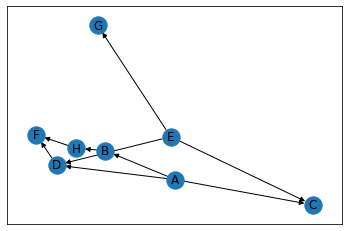

In [5]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('E', 'D'), ('D', 'F'), ('E', 'C'), ('E', 'G'), ('B', 'H'), ('H', 'F')])
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.show()

In [6]:
dot = Digraph()
dot.edges([('A', 'B'), ('A', 'C'), ('A', 'D'), ('E', 'D'), ('D', 'F'), ('E', 'C'), ('E', 'G'), ('B', 'H'), ('H', 'F')])
dot.format = 'png'
dot.render('Graph', view = True)

'Graph.png'

In [7]:
# A row vector with all values as columns
ap = np.ones((1,3))
an = np.zeros((1,3))

In [8]:
d = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('E', 'D'), ('D', 'F'), ('E', 'C'), ('E', 'G'), ('B', 'H'), ('H', 'F')]
AG = pgv.AGraph()
AG.add_edges_from(d)
#AG.draw("file.png")

In [9]:
ap[:,1:2] = 2
ap[:,0:1] = 4
ap[:,-1]  = 0.00000001

In [10]:
an[:,1:2] = 4
an[:,0:1] = 0.00000001
an[:,-1] = 2

In [11]:
print(ap)
print(an)

[[4.e+00 2.e+00 1.e-08]]
[[1.e-08 4.e+00 2.e+00]]


In [12]:
print(ap.T)

[[4.e+00]
 [2.e+00]
 [1.e-08]]


In [13]:
getOnes = np.ones((ap.T.shape))

In [14]:
print(getOnes.shape)
print(getOnes)

(3, 1)
[[1.]
 [1.]
 [1.]]


In [15]:
getOnes1 = np.ones((1,))

In [16]:
print(getOnes1.shape)
print(getOnes1)

(1,)
[1.]


In [17]:
# TEST should be 0.540852
c,_ = Gain(ap, an, 6.0, 6.0)
print("Gain() returns ", c)
amin = np.argmin(c)
print(c[:,amin])



From Gain()
B(q) for total p and n is:  1.0
REMAINDER is:  [[2.50150997e-08 4.59147917e-01 2.41817665e-08]]
Gain returned is  [[0.99999997 0.54085208 0.99999998]]
Gain() returns  [[0.99999997 0.54085208 0.99999998]]
[0.54085208]


In [18]:
r = Remainder(ap, an, 6, 6)
print(r)

[[2.50150997e-08 4.59147917e-01 2.41817665e-08]]


In [19]:
# TEST should be 1.0
print(B(0.5))

1.0


In [20]:
# TEST should be 0.5
print(BDiscrete(6,6))

0.5


In [21]:
data = pd.read_csv("titanic/train.csv")

In [22]:
data.head()

Survived  Pclass                                  Name     Sex   Age  \
0         0       3  Hagland, Mr. Konrad Mathias Reiersen    male   NaN   
1         1       3            Aks, Mrs. Sam (Leah Rosen)  female  18.0   
2         1       1              Young, Miss. Marie Grice  female  36.0   
3         0       2                    Gale, Mr. Shadrach    male  34.0   
4         0       3                     McNamee, Mr. Neal    male  24.0   

   SibSp  Parch    Ticket      Fare Cabin Embarked  
0      1      0     65304   19.9667   NaN        S  
1      0      1    392091    9.3500   NaN        S  
2      0      0  PC 17760  135.6333   C32        C  
3      1      0     28664   21.0000   NaN        S  
4      1      0    376566   16.1000   NaN        S

In [23]:
# Test PluralityValue on dataset titanic/train.csv adjusted complete dataset 
# (expected highest value on Parch = 695)
df = data.drop(columns=["Name", "Ticket", "Fare", "Age", "Cabin", "Sex", "Embarked"])

# Rename the dependent variable Y to name "Target"
df = df.rename(columns={"Survived":"Target"})

# TEST PluralityValue
print(PluralityValue(df))



Running PLURALITY_VALUE(examples) ['Target', 'Pclass', 'SibSp', 'Parch']
TYPE of examples --->  <class 'pandas.core.frame.DataFrame'>
Attribute -- >  Target
ValList0  559
ValList1  340
Attribute -- >  Pclass
ValList0  352
ValList1  131
Found a better candidate! Pclass
Attribute -- >  SibSp
ValList0  411
ValList1  207
Found a better candidate! SibSp
Attribute -- >  Parch
ValList0  461
ValList1  233
Found a better candidate! Parch
('', 0)


In [24]:
df.head()

Target  Pclass  SibSp  Parch
0       0       3      1      0
1       1       3      0      1
2       1       1      0      0
3       0       2      1      0
4       0       3      1      0

In [25]:
print(df.isnull().sum())

Target    0
Pclass    0
SibSp     0
Parch     0
dtype: int64


In [26]:
print(df.isna().sum())

Target    0
Pclass    0
SibSp     0
Parch     0
dtype: int64


In [27]:
print(df.notnull().sum())

Target    899
Pclass    899
SibSp     899
Parch     899
dtype: int64


In [28]:
print(df["Parch"].notnull().sum())

899


In [29]:
df["Parch"].value_counts().max()

694

In [30]:
countTarget = df['Pclass'].value_counts()

In [31]:
countTarget.head()

3    480
1    220
2    199
Name: Pclass, dtype: int64

In [32]:
print(df['Pclass'].value_counts().sort_index().index.to_numpy())

[1 2 3]


In [33]:
result_df0 = df["Parch"][df['Target'] == 0].value_counts()
result_df1 = df["Parch"][df['Target'] == 1].value_counts()

VL1 = df["Parch"][df['Target'] == 0].value_counts()

In [34]:
print(VL1.max())

461


In [35]:
print(VL1.sort_index().max())

461


In [36]:
print(result_df0.sort_index())

0    461
1     52
2     33
3      3
4      3
5      5
6      1
9      1
Name: Parch, dtype: int64


In [37]:
df["Pclass"].head()

0    3
1    3
2    1
3    2
4    3
Name: Pclass, dtype: int64

In [38]:
print(df["Pclass"].iloc[0:1][0])

3


In [39]:
df.head()

Target  Pclass  SibSp  Parch
0       0       3      1      0
1       1       3      0      1
2       1       1      0      0
3       0       2      1      0
4       0       3      1      0

In [40]:
print(result_df1.sort_index())

0    233
1     60
2     39
3      4
4      2
5      1
9      1
Name: Parch, dtype: int64


In [41]:
dfT0 = result_df0.sort_index().index.to_numpy()
dfT1 = result_df1.sort_index().index.to_numpy()

In [42]:
print([i == j for i, j in zip(dfT1, dfT0)])

[True, True, True, True, True, True, False]


In [43]:
df.agg(np.mean)

Target    0.378198
Pclass    2.289210
SibSp     0.486096
Parch     0.390434
dtype: float64

In [44]:
print(df.apply(lambda x: True if 3 in list(x) else False, axis=0))

Target    False
Pclass     True
SibSp      True
Parch      True
dtype: bool


In [45]:
print(df["Target"].unique())
print(df["Pclass"].unique())
print(df["Target"].nunique())
print(df["Pclass"].nunique())

[0 1]
[3 1 2]
2
3


In [46]:
# Get number of possible values in each attribute
print(df.nunique())

Target    2
Pclass    3
SibSp     7
Parch     8
dtype: int64


In [47]:
print(df.Target.value_counts())

0    559
1    340
Name: Target, dtype: int64


In [48]:
print(df.Pclass.value_counts())

3    480
1    220
2    199
Name: Pclass, dtype: int64


In [49]:
print([*df])

['Target', 'Pclass', 'SibSp', 'Parch']


In [50]:
#model = dtc(criterion = 'entropy', max_depth = 4)
#model.fit(df[["Parch", "Pclass", "SibSp"]], df.Target)

In [51]:
#plot(df, model)
df.head()

Target  Pclass  SibSp  Parch
0       0       3      1      0
1       1       3      0      1
2       1       1      0      0
3       0       2      1      0
4       0       3      1      0

In [52]:
tree = RunLDT(df)



START LDT()


Attributes:  ['Target', 'Pclass', 'SibSp', 'Parch']
TYPE of examples in LDT()  <class 'pandas.core.frame.DataFrame'>
TYPE of attributes ----->   <class 'list'>
Attributes before:  ['Pclass', 'SibSp', 'Parch']
Shape attribpos:  (340,)
Shape attribneg:  (559,)

Attrib pos:
 1    131
2     81
3    128
Name: Pclass, dtype: int64

Attrib neg:
 1     89
2    118
3    352
Name: Pclass, dtype: int64
Shape ap:  (3,)
Shape an:  (3,)
Type ap:  <class 'numpy.ndarray'>

ap -->  [131  81 128]

an -->  [ 89 118 352]


ATTRIBUTE CHECKED:  Pclass


From Gain()
B(q) for total p and n is:  [0.95675938]
REMAINDER is:  [0.23824299 0.21580486 0.44670473]
Gain returned is  [0.71851639 0.74095452 0.51005464]


Attribute  Pclass
The important index:  2
Attributes after:  ['SibSp', 'Parch']
Value for subtree:  None
Examples before subtree:  Empty DataFrame
Columns: [Target, Pclass, SibSp, Parch]
Index: []


START LDT()


Attributes:  ['SibSp', 'Parch']
TYPE of examples in LDT()  <class 'pandas.c

In [53]:
dataset10 = df.copy()
att =[*dataset10]
k = "Pclass"
dataset100 = dataset10.loc[:,att][dataset10[k] == 3].copy()
dataset100.head()

Target  Pclass  SibSp  Parch
0        0       3      1      0
1        1       3      0      1
4        0       3      1      0
5        0       3      0      0
11       1       3      0      0

In [54]:
print(tree.count())

5


In [75]:
print(dataset100.Target.unique()[0])

0


In [55]:
for t in tree.nodes:
    print(t)

Root
Pclass
Value0
Value1
Value2


In [56]:
treeList = tree.nodes["Value2"]
for t in treeList:
    
    print("Attribute: ", t.attribute)
    print("Child: " , t.child)
    print("Parent: " , t.parent)
    print("Weight: ", t.weight)
    print("Gain: ", t.gain)
    print("Leaf: ", t.leaf)
    print("Index: ", t.index)


Attribute:  Value2
Child:  None
Parent:  Pclass
Weight:  480
Gain:  0.5100546417347787
Leaf:  -1
Index:  2


In [57]:
treeList2 = tree.nodes["Pclass"]
for t in treeList2:
    #t.child = "JA"
    print("Attribute: ", t.attribute)
    print("Child: " , t.child)
    print("Parent: " , t.parent)
    print("Weight: ", t.weight)
    print("Gain: ", t.gain)
    print("Leaf: ", t.leaf)
    print("Index: ", t.index)

Attribute:  Pclass
Child:  Value2
Parent:  None
Weight:  None
Gain:  0.5100546417347787
Leaf:  -1
Index:  2


In [58]:
getImp = Importance(df, "Parch")

Removed value item 6 from Parch before analysis.
Shape attribpos:  (340,)
Shape attribneg:  (559,)

Attrib pos:
 0    233
1     60
2     39
3      4
4      2
5      1
9      1
Name: Parch, dtype: int64

Attrib neg:
 0    461
1     52
2     33
3      3
4      3
5      5
6      1
9      1
Name: Parch, dtype: int64
Shape ap:  (7,)
Shape an:  (7,)
Type ap:  <class 'numpy.ndarray'>

ap -->  [233  60  39   4   2   1   1]

an -->  [461  52  33   3   3   5   1]


ATTRIBUTE CHECKED:  Parch


From Gain()
B(q) for total p and n is:  [0.95675938]
REMAINDER is:  [0.71073526 0.12412397 0.07968733 0.00767141 0.00540017 0.0043383
 0.00222469]
Gain returned is  [0.24602412 0.8326354  0.87707205 0.94908797 0.95135921 0.95242107
 0.95453468]


In [59]:
print(getImp)

(array([0.24602412, 0.8326354 , 0.87707205, 0.94908797, 0.95135921,
       0.95242107, 0.95453468]), 0)


In [60]:
print(getImp[0])

[0.24602412 0.8326354  0.87707205 0.94908797 0.95135921 0.95242107
 0.95453468]


In [61]:
print(getImp[1])

0


In [62]:
print(getImp[0][0])

0.24602411635637955


In [63]:
v1 = 0
attr = "Value" + str(v1)

print(attr)

Value0


In [64]:
diction = defaultdict(list)
for k, v in d:
    diction[k].append(v)
    print("key --> ", k)
    print("value:  ", v)

key -->  A
value:   B
key -->  A
value:   C
key -->  A
value:   D
key -->  E
value:   D
key -->  D
value:   F
key -->  E
value:   C
key -->  E
value:   G
key -->  B
value:   H
key -->  H
value:   F


In [65]:
att3 = [*df]

data99 = df.loc[:,["Target","Pclass","SibSp", "Parch"]][df["Pclass"] == 3].copy()
data99.head()

Target  Pclass  SibSp  Parch
0        0       3      1      0
1        1       3      0      1
4        0       3      1      0
5        0       3      0      0
11       1       3      0      0

In [66]:
df.loc[:,att3][df["Pclass"] == 3].head()

Target  Pclass  SibSp  Parch
0        0       3      1      0
1        1       3      0      1
4        0       3      1      0
5        0       3      0      0
11       1       3      0      0

In [67]:
val1 = data99[data99["Target"] == 1].value_counts()
val0 = data99[data99["Target"] == 0].value_counts()
print(val1.max())
print(val0.max())

74
250


In [68]:
for a2 , e2 in data99.items():
    print(a2)
    print(e2[data99["Target"] == 1].value_counts().max())
    print(e2[data99["Target"] == 0].value_counts().max())

Target
128
352
Pclass
128
352
SibSp
88
266
Parch
91
280


In [69]:
print(PluralityValue(data99, "Pclass"))



Running PLURALITY_VALUE(examples) ['Target', 'Pclass', 'SibSp', 'Parch']
TYPE of examples --->  <class 'pandas.core.frame.DataFrame'>
Attribute -- >  Target
ValList0  352
ValList1  128
Attribute -- >  Pclass
ValList0  352
ValList1  128
Attribute -- >  SibSp
ValList0  266
ValList1  88
Found a better candidate! SibSp
Attribute -- >  Parch
ValList0  280
ValList1  91
Found a better candidate! Parch
('', 0)


In [70]:
tree3 = RunLDT(data99[["Target","Pclass"]])



START LDT()


Attributes:  ['Target', 'Pclass']
TYPE of examples in LDT()  <class 'pandas.core.frame.DataFrame'>
TYPE of attributes ----->   <class 'list'>
Attributes before:  ['Pclass']
Shape attribpos:  (340,)
Shape attribneg:  (559,)

Attrib pos:
 1    131
2     81
3    128
Name: Pclass, dtype: int64

Attrib neg:
 1     89
2    118
3    352
Name: Pclass, dtype: int64
Shape ap:  (3,)
Shape an:  (3,)
Type ap:  <class 'numpy.ndarray'>

ap -->  [131  81 128]

an -->  [ 89 118 352]


ATTRIBUTE CHECKED:  Pclass


From Gain()
B(q) for total p and n is:  [0.83664074]
REMAINDER is:  [0.44620927 0.40418452 0.83664074]
Gain returned is  [0.39043147 0.43245622 0.        ]


Attribute  Pclass
The important index:  2
Attributes after:  []
Value for subtree:  None
Examples before subtree:  Empty DataFrame
Columns: [Target, Pclass]
Index: []


START LDT()


Attributes:  []
TYPE of examples in LDT()  <class 'pandas.core.frame.DataFrame'>
TYPE of attributes ----->   <class 'list'>
NO EXAMPLES LEFT 

In [71]:
print(tree.count())

5


In [72]:
data99.head()

Target  Pclass  SibSp  Parch
0        0       3      1      0
1        1       3      0      1
4        0       3      1      0
5        0       3      0      0
11       1       3      0      0

In [73]:
#all(e[self.dataset.target] == class0 for e in examples)
#data99[data99["Target"] == 0]
D99 = data99["Pclass"][data99.Target == 0]
print(data99.Target.nunique())

2
